In [1]:
import pandas as pd
import numpy as np
import lifetime
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv(r"data/olist_customers_dataset.csv")
orders = pd.read_csv(r"data/olist_orders_dataset.csv")
payments = pd.read_csv(r"data/olist_order_payments_dataset.csv")
orders_items = pd.read_csv(r"data/olist_order_items_dataset.csv")

In [3]:
pd.set_option('display.max_rows', 40)



In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<h3 style="background-color: lightblue; padding: 10px;">
    Knowing the data
</h3>


In [8]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


<h6>
   <li>Lets check the number of unique values,</li> 
   <li> number of missing data,</li>
   <li>biggest category counts,</li> 
   <li>data type</li>
</h6>

In [9]:
def get_status(data):
    stat=[]
    for col in data.columns:
        stat.append([col,data[col].nunique(),data[col].isnull().sum()*100/customers.shape[0],data[col].value_counts(normalize=True,dropna=False).values[0]*100,data[col].dtype])
    return pd.DataFrame(stat,columns=["features","uniue","missing value pecentage","largest category_count percentage","data type"])

<h3 style="background-color: lightblue; padding: 10px;">
    Customer Data Status
</h3>


In [10]:
get_status(customers)

,features,uniue,missing value pecentage,largest category_count percentage,data type
0,customer_id,99441,0.0,0.001006,object
1,customer_unique_id,96096,0.0,0.017096,object
2,customer_zip_code_prefix,14994,0.0,0.142798,int64
3,customer_city,4119,0.0,15.627357,object
4,customer_state,27,0.0,41.980672,object


In [11]:
customers["customer_state"].value_counts(normalize=True,dropna=True).head()

customer_state
SP    0.419807
RJ    0.129242
MG    0.117004
RS    0.054967
PR    0.050734
Name: proportion, dtype: float64

<h3 style="background-color: lightblue; padding: 10px;">
    Payments Data Status
</h3>

In [12]:
get_status(payments)

,features,uniue,missing value pecentage,largest category_count percentage,data type
0,order_id,99440,0.0,0.027915,object
1,payment_sequential,29,0.0,95.643301,int64
2,payment_type,5,0.0,73.922376,object
3,payment_installments,24,0.0,50.580444,int64
4,payment_value,29077,0.0,0.311880,float64


In [13]:
payments["payment_type"].value_counts(normalize=True,dropna=True)

payment_type
credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: proportion, dtype: float64

In [14]:
payments["payment_installments"].value_counts(normalize=True,dropna=True).head()

payment_installments
1     0.505804
2     0.119487
3     0.100697
4     0.068325
10    0.051287
Name: proportion, dtype: float64

5 types of payments are there


here 73 percentage of them using credit card payment

having 50 per centage having 1st installment



<h3 style="background-color: lightblue; padding: 10px;">
    Orders Data Status
</h3>

In [15]:
get_status(orders)

,features,uniue,missing value pecentage,largest category_count percentage,data type
0,order_id,99441,0.000000,0.001006,object
1,customer_id,99441,0.000000,0.001006,object
2,order_status,8,0.000000,97.020344,object
3,order_purchase_timestamp,98875,0.000000,0.003017,object
4,order_approved_at,90733,0.160899,0.160899,object
5,order_delivered_carrier_date,81018,1.793023,1.793023,object
6,order_delivered_customer_date,95664,2.981668,2.981668,object
7,order_estimated_delivery_date,459,0.000000,0.524934,object


In [16]:
orders["order_status"].value_counts(normalize=True,dropna=True)

order_status
delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: proportion, dtype: float64

few values are missing,97 percentage order are delivered,few of the status are unavilable

<h3 style="background-color: lightblue; padding: 10px;">
    orders_items Data Status
</h3>

In [17]:
get_status(orders_items)

,features,uniue,missing value pecentage,largest category_count percentage,data type
0,order_id,98666,0.0,0.018642,object
1,order_item_id,21,0.0,87.586329,int64
2,product_id,32951,0.0,0.467821,object
3,seller_id,3095,0.0,1.804705,object
4,shipping_limit_date,93318,0.0,0.018642,object
5,price,5968,0.0,2.202397,float64
6,freight_value,6999,0.0,3.290723,float64


In [18]:
orders_items["order_item_id"].value_counts(normalize=True,dropna=True)

order_item_id
1     0.875863
2     0.087022
3     0.020302
4     0.008566
5     0.004083
6     0.002273
7     0.000515
8     0.000320
9     0.000249
10    0.000222
11    0.000151
12    0.000115
13    0.000071
14    0.000062
15    0.000044
16    0.000027
17    0.000027
18    0.000027
19    0.000027
20    0.000027
21    0.000009
Name: proportion, dtype: float64

lots order but fewer items

87% one category is dominated


<h3 style="background-color: lightblue; padding: 10px;">
    Data Preprocessing
</h3>

In [19]:
df1=payments.merge(orders,on="order_id")
df2=df1.merge(orders_items,on="order_id")
df=customers.merge(df2,on="customer_id")


In [20]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,credit_card,2,146.87,...,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1,credit_card,8,335.48,...,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1,credit_card,7,157.73,...,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1,credit_card,1,173.30,...,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1,credit_card,8,252.25,...,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [21]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

<h5 style="background-color: #e8f0fe; padding: 8px;">
    Creating new columns/Feature Engineering
</h5>


In [22]:
df["order_date"]=pd.to_datetime(df['order_purchase_timestamp']).dt.date
df["order_estimated_delivery_date"]=pd.to_datetime(df["order_estimated_delivery_date"])
df["order_delivered_customer_date"]=pd.to_datetime(df["order_delivered_customer_date"])
df['order_purchase_timestamp']=pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_carrier_date']=pd.to_datetime(df['order_delivered_carrier_date'])
df["'shipping_limit_date'"]=pd.to_datetime(df['shipping_limit_date'])

In [23]:
df["delivery_against_estimated"]=(df["order_estimated_delivery_date"]-df["order_delivered_customer_date"]).dt.days
df["order_purchase_year"]=df['order_purchase_timestamp'].apply(lambda x:x.year)
df["order_purchase_month"]=df['order_purchase_timestamp'].apply(lambda x:x.month)
df["dayofweek"]=df['order_purchase_timestamp'].apply(lambda x:x.dayofweek)
df["day"]=df["dayofweek"].map({0:"Mon",1:"Tue",2:"Wed",3:"Thurs",4:"Fri",5:"Sat",6:"Sun"})
df["order_purchase_hour"]=df['order_purchase_timestamp'].apply(lambda x:x.hour)
df["order_purchase_mon"]=df["order_purchase_mon"] = df["order_purchase_month"].map({
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
})




In [24]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,...,freight_value,order_date,'shipping_limit_date',delivery_against_estimated,order_purchase_year,order_purchase_month,dayofweek,day,order_purchase_hour,order_purchase_mon
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,credit_card,2,146.87,...,21.88,2017-05-16,2017-05-22 15:22:12,10.0,2017,5,1,Tue,15,May
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1,credit_card,8,335.48,...,46.48,2018-01-12,2018-01-18 20:58:32,7.0,2018,1,4,Fri,20,Jan
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1,credit_card,7,157.73,...,17.79,2018-05-19,2018-06-05 16:19:10,-2.0,2018,5,5,Sat,16,May
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1,credit_card,1,173.30,...,23.36,2018-03-13,2018-03-27 16:31:16,12.0,2018,3,1,Tue,16,Mar
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1,credit_card,8,252.25,...,22.25,2018-07-29,2018-07-31 10:10:09,5.0,2018,7,6,Sun,9,Jul


In [25]:
df['month_year']=df["order_purchase_month"].astype(str).apply(lambda x:'0' + x if len(x)==1 else x)

In [26]:
df['month_year'] =df["order_purchase_year"].astype(str) + '-' + df['month_year'].astype(str)

In [27]:
df['month_y'] = df['order_purchase_timestamp'].map(lambda date:100*date.year + date.month)

In [28]:
df['order_purchase_timestamp'].head()

0   2017-05-16 15:05:35
1   2018-01-12 20:48:24
2   2018-05-19 16:07:45
3   2018-03-13 16:06:38
4   2018-07-29 09:51:30
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [29]:
df['month_y'].head()

0    201705
1    201801
2    201805
3    201803
4    201807
Name: month_y, dtype: int64

<h5 style="background-color: #e8f0fe; padding: 8px;">
    Lets check the summary
</h5>

In [30]:
df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,...,'shipping_limit_date',delivery_against_estimated,order_purchase_year,order_purchase_month,dayofweek,day,order_purchase_hour,order_purchase_mon,month_year,month_y
count,117601,117601,117601.000000,117601,117601,117601,117601.000000,117601,117601.000000,117601.000000,...,117601,115034.000000,117601.000000,117601.000000,117601.000000,117601,117601.000000,117601,117601,117601.000000
unique,98665,95419,NaN,4110,27,98665,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7,NaN,12,24,NaN
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,NaN,credit_card,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Mon,NaN,Aug,2017-11,NaN
freq,63,75,NaN,18590,49566,63,NaN,86769,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19130,NaN,12632,9016,NaN
mean,NaN,NaN,35051.793097,NaN,NaN,NaN,1.093528,NaN,2.939482,172.686752,...,2018-01-06 07:44:03.344223232,11.043326,2017.538193,6.028129,2.745750,NaN,14.760002,NaN,NaN,201759.847399
min,NaN,NaN,1003.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,...,2016-09-19 00:15:34,-189.000000,2016.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,201609.000000
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,60.870000,...,2017-09-18 22:15:28,6.000000,2017.000000,3.000000,1.000000,NaN,11.000000,NaN,NaN,201709.000000
50%,NaN,NaN,24315.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,108.210000,...,2018-01-25 11:57:49,12.000000,2018.000000,6.000000,3.000000,NaN,15.000000,NaN,NaN,201801.000000
75%,NaN,NaN,58600.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,189.260000,...,2018-05-10 07:51:17,16.000000,2018.000000,8.000000,4.000000,NaN,19.000000,NaN,NaN,201805.000000
max,NaN,NaN,99990.000000,NaN,NaN,NaN,29.000000,NaN,24.000000,13664.080000,...,2020-04-09 22:35:08,146.000000,2018.000000,12.000000,6.000000,NaN,23.000000,NaN,NaN,201809.000000


some order_id are repeating

4 unique payment type exist

there are zero value payment

some freight value is so high equal to the order value 

In [31]:
get_status(df)

,features,uniue,missing value pecentage,largest category_count percentage,data type
0,customer_id,98665,0.000000,0.053571,object
1,customer_unique_id,95419,0.000000,0.063775,object
2,customer_zip_code_prefix,14976,0.000000,0.134353,int64
3,customer_city,4110,0.000000,15.807689,object
4,customer_state,27,0.000000,42.147601,object
5,order_id,98665,0.000000,0.053571,object
6,payment_sequential,29,0.000000,95.711771,int64
7,payment_type,4,0.000000,73.782536,object
8,payment_installments,24,0.000000,49.843964,int64
9,payment_value,28938,0.000000,0.297617,float64


<h5 style="background-color: #e8f0fe; padding: 8px;">
    Treating the Missing values
</h5>

<h4>
   <ul>Only few missing values are there so dropping is better approach,</ul>
   <li>order_delivered_carrier_date	1.251999% missing,	  </li>
   <li>order_delivered_customer_date	2.581430% missing,</li>
   <li>delivery_against_estimated	 	2.581430% missing,</li>	
   <li> order_approved_at           	0.015084% missing </li>
</h4>

In [32]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
order_date                          0
'shipping_limit_date'               0
delivery_against_estimated       2567
order_purchase_year                 0
order_purcha

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().any()

customer_id                      False
customer_unique_id               False
customer_zip_code_prefix         False
customer_city                    False
customer_state                   False
order_id                         False
payment_sequential               False
payment_type                     False
payment_installments             False
payment_value                    False
order_status                     False
order_purchase_timestamp         False
order_approved_at                False
order_delivered_carrier_date     False
order_delivered_customer_date    False
order_estimated_delivery_date    False
order_item_id                    False
product_id                       False
seller_id                        False
shipping_limit_date              False
price                            False
freight_value                    False
order_date                       False
'shipping_limit_date'            False
delivery_against_estimated       False
order_purchase_year      

In [35]:
df.to_csv(r"Final_data/final_data_csv")

<h3 style="background-color: lightblue; padding: 10px;">
    Exploratory Data Analysis
</h3>

In [36]:
def format_spines(ax, right_border=True):
    """Format the graphs"""
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
   

let check the number of order everyday

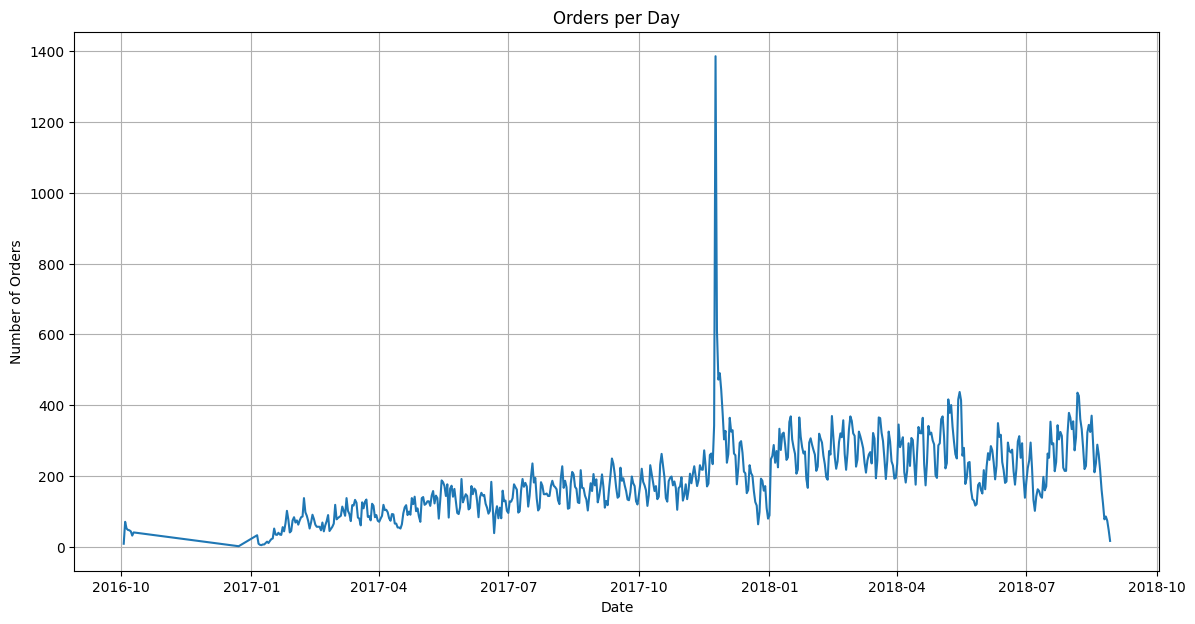

In [37]:
plt.figure(figsize = (14,7))

df["order_date"].value_counts().sort_index().plot()
plt.title("Orders per Day")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()


<H5>INFERENCE<H5></H5>
Orders per day see to have peaks and flats regions.
The highest peak is observed somewhere near 2017-Aug.


Let's check the __revenue per day__

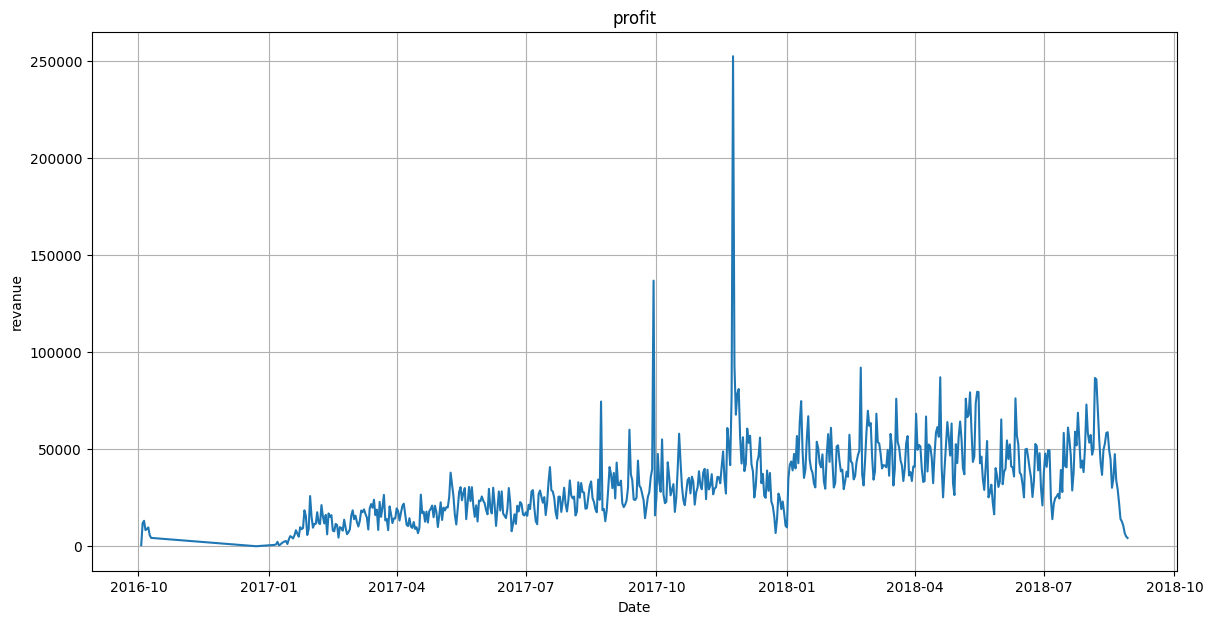

In [38]:
plt.figure(figsize = (14,7))

df.groupby("order_date")["payment_value"].agg("sum").sort_index().plot()
plt.title("profit")
plt.xlabel("Date")
plt.ylabel("revanue")
plt.grid()
plt.show()


__Observation__
- Similar observation as orders per day. But the highest peak happens at different time.

In [39]:
revanue=df.groupby("month_year")["payment_value"].agg("sum").reset_index()
revanue

,month_year,payment_value
0,2016-10,62591.65
1,2016-12,19.62
2,2017-01,176376.56
3,2017-02,323815.95
4,2017-03,505735.83
5,2017-04,456108.32
6,2017-05,701119.60
7,2017-06,585400.98
8,2017-07,716069.98
9,2017-08,842689.94


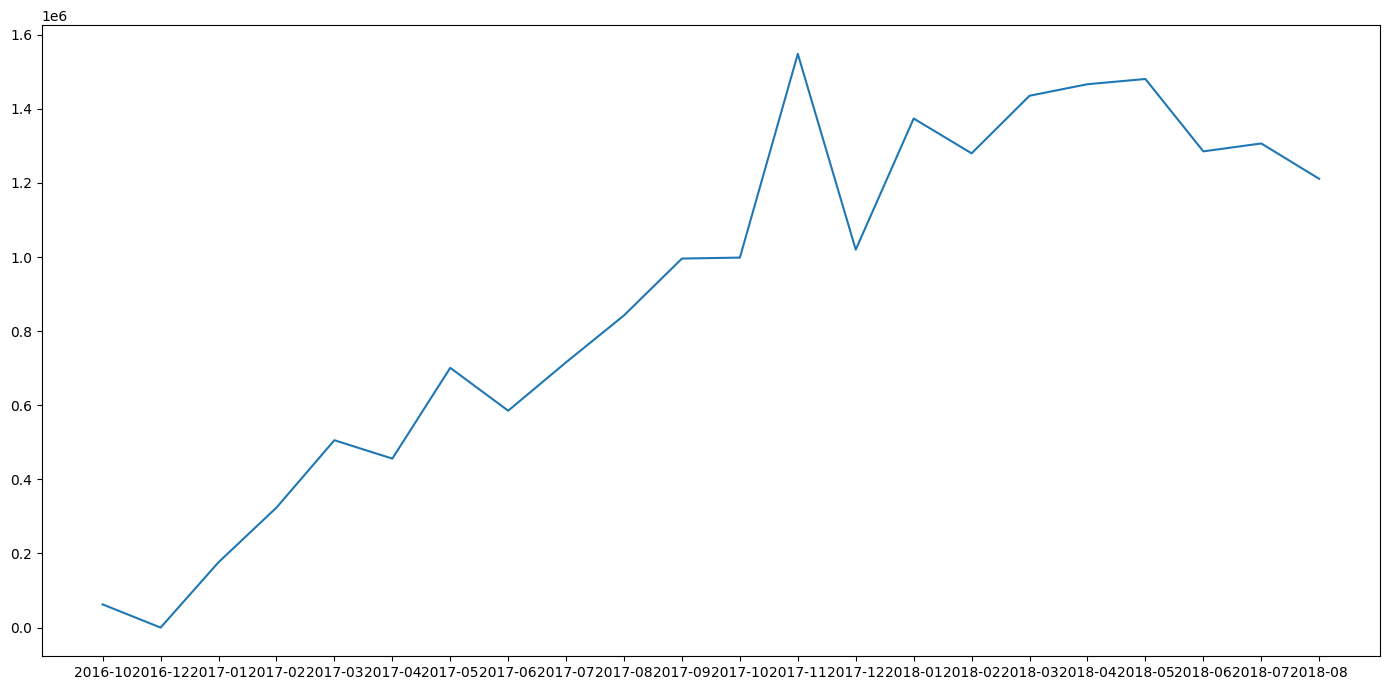

In [40]:
plt.figure(figsize = (14,7))
plt.plot(revanue["month_year"],revanue["payment_value"])
plt.tight_layout()

Inference: Revenue seem to have grown consistently over the years.

In [41]:
revanue['MonthlyGrowth'] = revanue['payment_value'].pct_change()
revanue['MonthlyGrowth'] 
revanue

,month_year,payment_value,MonthlyGrowth
0,2016-10,62591.65,NaN
1,2016-12,19.62,-0.999687
2,2017-01,176376.56,8988.630989
3,2017-02,323815.95,0.835935
4,2017-03,505735.83,0.561800
5,2017-04,456108.32,-0.098129
6,2017-05,701119.60,0.537178
7,2017-06,585400.98,-0.165048
8,2017-07,716069.98,0.223213
9,2017-08,842689.94,0.176826


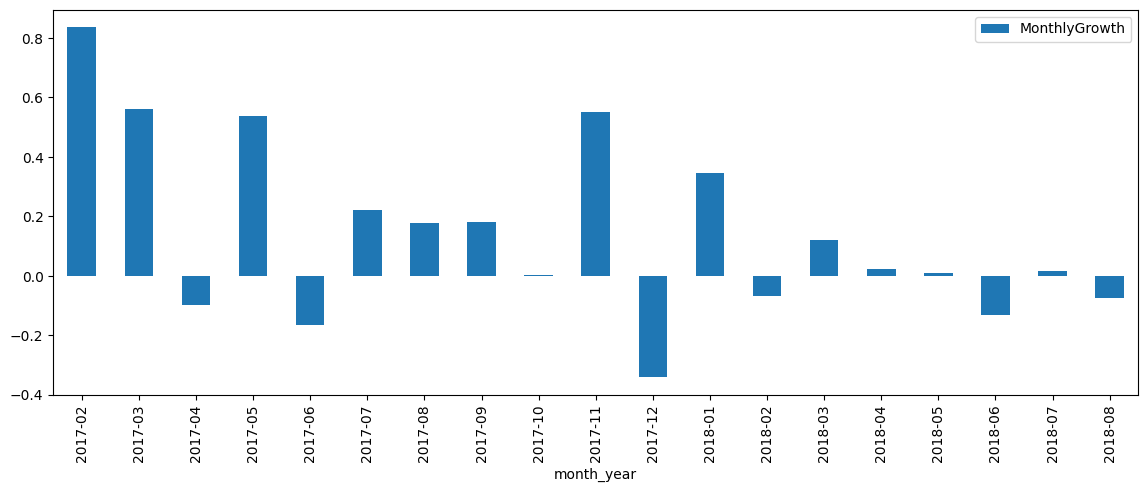

In [42]:
revanue.iloc[3:, :].plot.bar(x="month_year", y="MonthlyGrowth", figsize=(14,5));

Inference


Except for a few months showing temporary dips, the company’s monthly sales generally exhibit a consistent upward growth pattern. Specifically, months such as 2017-04, 2017-06, 2017-12, 2018-02, 2018-06, and 2018-08 show negative monthly growth, but outside these exceptions, the trend remains positive. Overall, the data indicates that the company is steadily increasing its sales over time, with most months contributing positively to year-over-year growth.

In [43]:
df_monthly_active=df.groupby("month_year")["customer_id"].nunique().reset_index()

In [44]:
df_monthly_active

,month_year,customer_id
0,2016-10,270
1,2016-12,1
2,2017-01,748
3,2017-02,1641
4,2017-03,2546
5,2017-04,2303
6,2017-05,3545
7,2017-06,3135
8,2017-07,3872
9,2017-08,4193


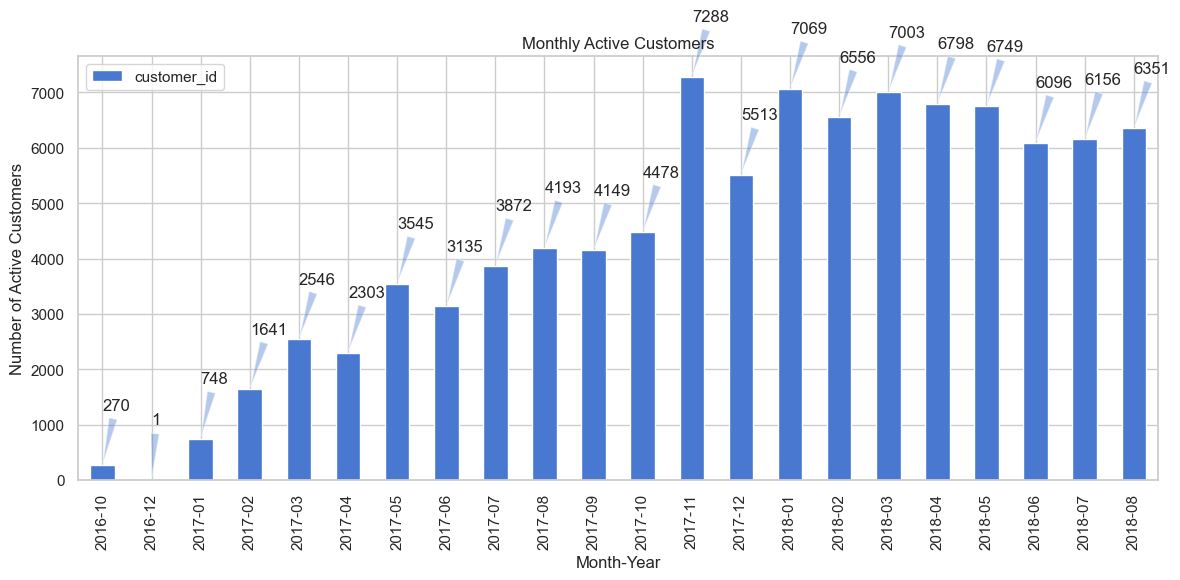

In [62]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
df_monthly_active.plot.bar(
    x="month_year",
    y="customer_id",
    ax=ax
)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Monthly Active Customers")
ax.set_xlabel("Month-Year")
ax.set_ylabel("Number of Active Customers")
for idx,row in df_monthly_active.iterrows():
    ax.annotate(text=row["customer_id"],
            xy=(idx,row["customer_id"]),
            xytext=(idx,row["customer_id"]+1000),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5",alpha=0.4));
plt.tight_layout()
plt.show()

Observation:

This visualization helps reveal how many active customers the company is adding each year by showing month-wise growth patterns. By examining the bar heights across months, we can identify periods of strong customer acquisition, seasonal fluctuations, and any months where customer engagement slows down. This makes it easier to evaluate year-over-year growth and understand whether the business is consistently increasing its active customer base or experiencing irregular patterns.

It is evident that the company is able to both retain its existing customers and steadily increase the number of active customers year over year

#### Average Revenue per Customer Purchase

In [67]:
average_monthly_revPerCustomere=df.groupby("month_year")["payment_value"].mean().reset_index()

In [68]:
average_monthly_revPerCustomere

,month_year,payment_value
0,2016-10,186.284673
1,2016-12,19.620000
2,2017-01,183.534402
3,2017-02,166.144664
4,2017-03,164.306637
5,2017-04,168.492176
6,2017-05,164.582066
7,2017-06,158.774337
8,2017-07,151.517135
9,2017-08,166.770224


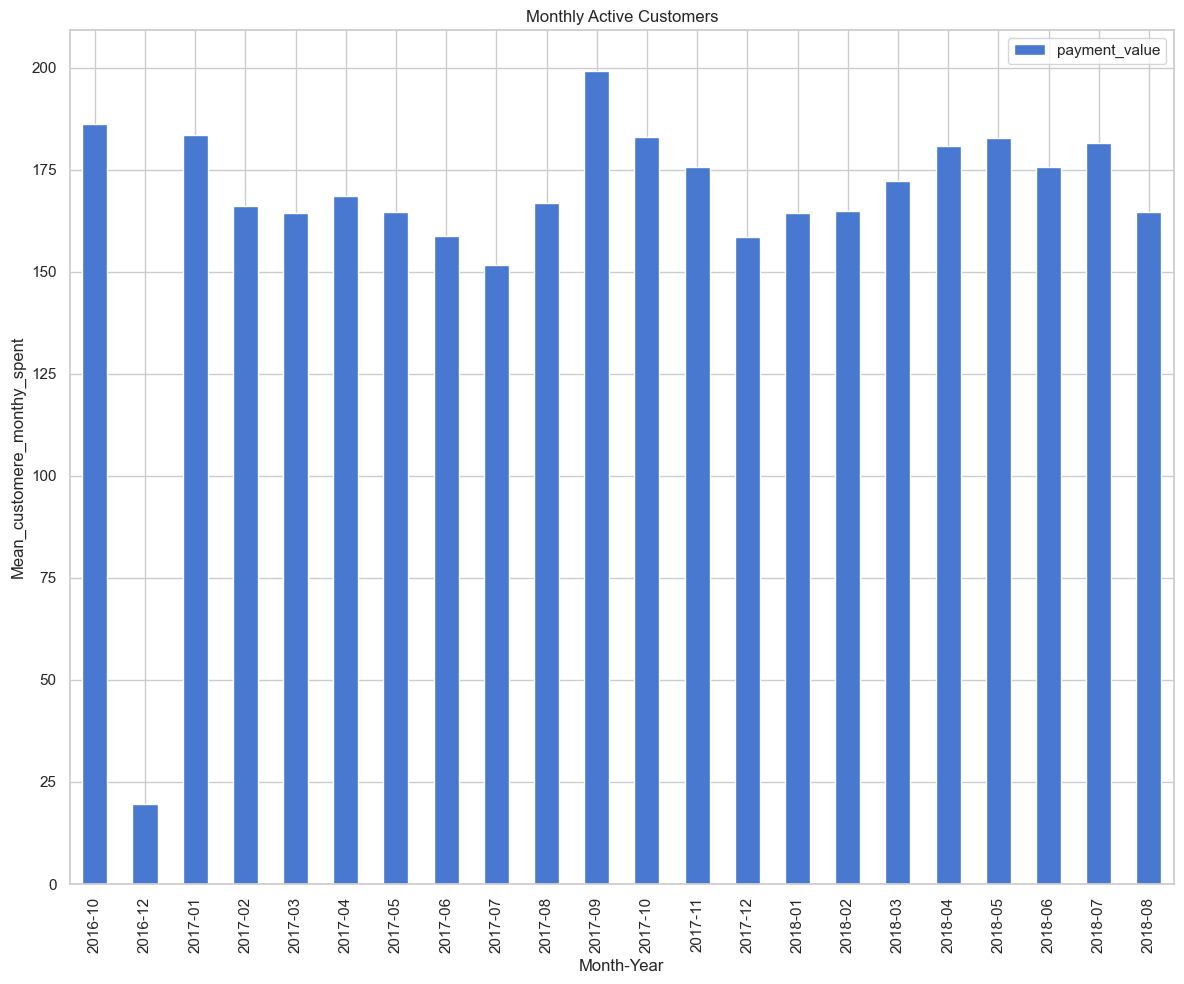

In [87]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(palette='muted', color_codes=True, style='whitegrid')
average_monthly_revPerCustomere.plot.bar(
    x="month_year",
    y="payment_value",
    ax=ax
)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Monthly Active Customers")
ax.set_xlabel("Month-Year")
ax.set_ylabel("Mean_customere_monthy_spent")

plt.tight_layout()
plt.show()

__Inference__

- The average revenue has remained more or less flat over time. 

In [96]:
df_min_purchase=df.groupby("customer_unique_id")["order_purchase_timestamp"].min().reset_index()
df_min_purchase.columns = ['customer_unique_id','minpurchasedate']
df_min_purchase['minpurchasedate']=df_min_purchase['minpurchasedate'].map(lambda date:100*date.year+date.month)
df=df_min_purchase.merge(df,on='customer_unique_id')

In [97]:
df_min_purchase

,customer_unique_id,minpurchasedate
0,0000366f3b9a7992bf8c76cfdf3221e2,201805
1,0000b849f77a49e4a4ce2b2a4ca5be3f,201805
2,0000f46a3911fa3c0805444483337064,201703
3,0000f6ccb0745a6a4b88665a16c9f078,201710
4,0004aac84e0df4da2b147fca70cf8255,201711
...,...,...
93336,fffcf5a5ff07b0908bd4e2dbc735a684,201706
93337,fffea47cd6d3cc0a88bd621562a9d061,201712
93338,ffff371b4d645b6ecea244b27531430a,201702
93339,ffff5962728ec6157033ef9805bacc48,201805


In [98]:
df.head()

,customer_unique_id,minpurchasedate,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,...,'shipping_limit_date',delivery_against_estimated,order_purchase_year,order_purchase_month,dayofweek,day,order_purchase_hour,order_purchase_mon,month_year,month_y
0,0000366f3b9a7992bf8c76cfdf3221e2,201805,fadbb3709178fc513abc1b2670aa1ad2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,1,credit_card,8,...,2018-05-15 11:11:18,4.0,2018,5,3,Thurs,10,May,2018-05,201805
1,0000b849f77a49e4a4ce2b2a4ca5be3f,201805,4cb282e167ae9234755102258dd52ee8,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,1,credit_card,1,...,2018-05-11 17:56:33,4.0,2018,5,0,Mon,11,May,2018-05,201805
2,0000f46a3911fa3c0805444483337064,201703,9b3932a6253894a02c1df9d19004239f,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,1,credit_card,8,...,2017-03-15 21:05:03,1.0,2017,3,4,Fri,21,Mar,2017-03,201703
3,0000f6ccb0745a6a4b88665a16c9f078,201710,914991f0c02ef0843c0e7010c819d642,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,1,credit_card,4,...,2017-10-18 21:49:17,11.0,2017,10,3,Thurs,20,Oct,2017-10,201710
4,0004aac84e0df4da2b147fca70cf8255,201711,47227568b10f5f58a524a75507e6992c,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,1,credit_card,6,...,2017-11-22 20:06:52,7.0,2017,11,1,Tue,19,Nov,2017-11,201711
